# Introduction
How Urban or Rural is your Region?
In this assignment, I will examine which regions have the highest or lowest urbanization index. The Urbanization Index projects the average rate of change of the size of the population over a period of time. The dataset is taken from FiveThirtyEight.com. According to FiveThirtyEight, the urbanization-state.csv contains the urbanization index for every state. "This number is calculated as the natural logarithm of the average number of people living within a five-mile radius of a given resident in each census tract in that state." The urban index is a calculation of how urban or rural the state or region is. 

The original question that I intended to examine was: "How Urban Or Rural Is Your State? And What Does That Mean For The 2020 Election?" However, the dataset did not provide any partisan lean voting index. Therefore, the content that I have analyzed for this assignment is much simpler than expected. Hence, I am only evaluating the urbanization index of each region. 

In [13]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import display

# to create gif
import imageio
import os

%matplotlib inline
sns.set(font_scale = 2)

In [17]:
df = pd.read_csv("datasets/urbanization-state.csv")
df = df.drop(columns="Unnamed: 4")
df = df.drop(columns="Unnamed: 5")
df.head()

,state,urbanindex,population,region
0,Alabama,9.605935,4850771.0,South
1,Alaska,8.735964,730436.0,West
2,American Samoa,11.085930,NaN,NaN
3,Arizona,11.299710,6777273.0,West
4,Arkansas,9.259444,2977944.0,South


In [18]:
display(df.describe())

,urbanindex,population
count,56.000000,5.200000e+01
mean,10.532501,6.237492e+06
std,1.106487,7.122005e+06
min,8.256294,5.832000e+05
25%,9.870129,1.791976e+06
50%,10.632330,4.224752e+06
75%,11.159558,6.884481e+06
max,13.440570,3.897790e+07


In [20]:
print(df.urbanindex.min(), df.urbanindex.max())

8.256294 13.440570000000001


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


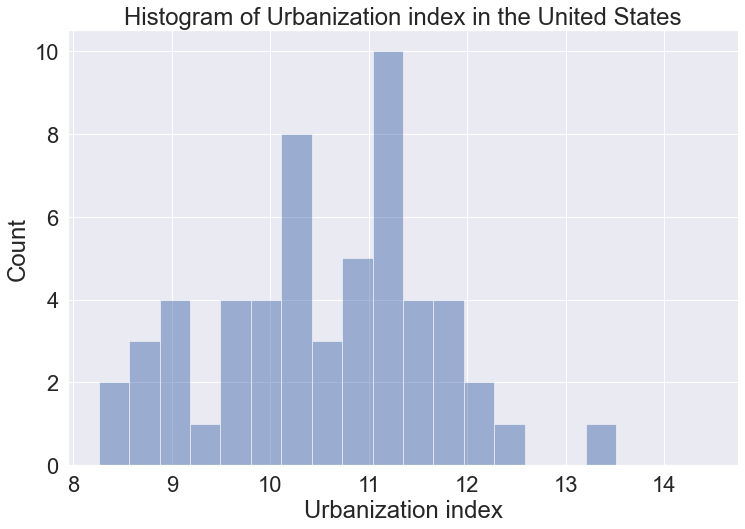

In [58]:
# prepare plot
f, axes = plt.subplots(figsize=(12, 8))

# set the plot
plt.hist(df.urbanindex,
         range=(df.urbanindex.min(), df.urbanindex.max()+1),
         bins=20,
         alpha=0.5)

# set title, legends and labels and xticks
plt.xlabel("Urbanization index")
plt.ylabel("Count")
plt.title("Histogram of Urbanization index in the United States")

# save and show plot
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/hist_60.png')
plt.show()

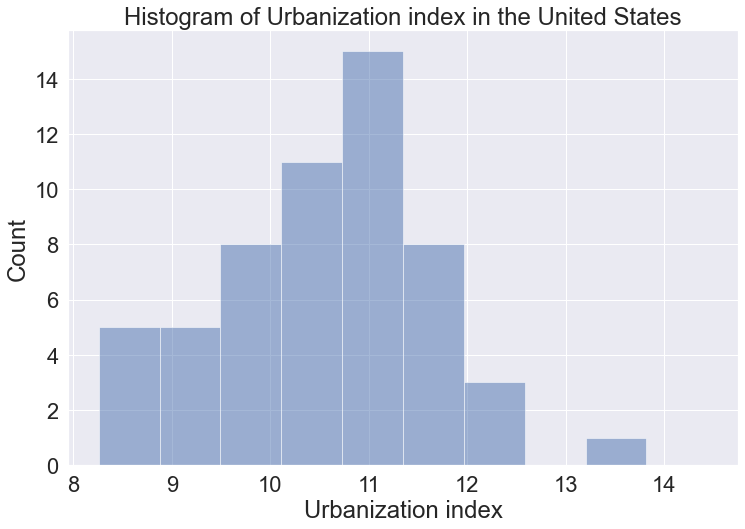

In [59]:
f, axes = plt.subplots(figsize=(12, 8))

# set the plot
plt.hist(df.urbanindex,
         range=(df.urbanindex.min(), df.urbanindex.max()+1),
         bins=10,
         alpha=0.5)

# set title, legends and labels and xticks
plt.xlabel("Urbanization index")
plt.ylabel("Count")
plt.title("Histogram of Urbanization index in the United States")

# save and show plot
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/hist_60.png')
plt.show()

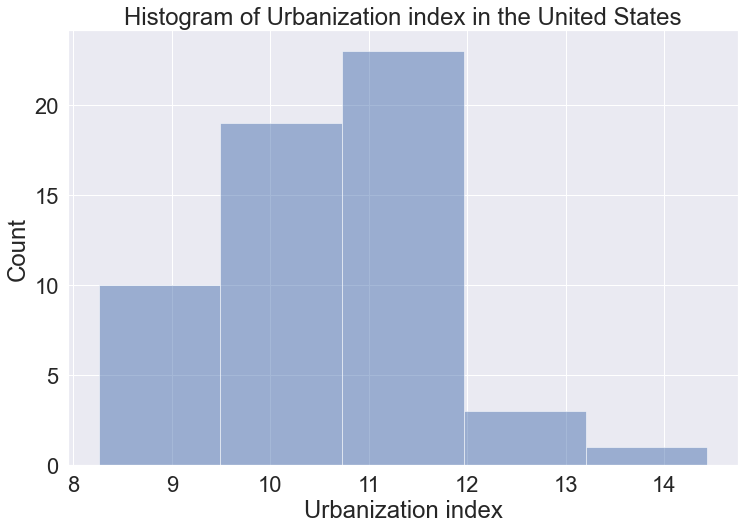

In [60]:
f, axes = plt.subplots(figsize=(12, 8))

# set the plot
plt.hist(df.urbanindex,
         range=(df.urbanindex.min(), df.urbanindex.max()+1),
         bins=5,
         alpha=0.5)

# set title, legends and labels and xticks
plt.xlabel("Urbanization index")
plt.ylabel("Count")
plt.title("Histogram of Urbanization index in the United States")

# save and show plot
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/hist_60.png')
plt.show()

# Interpretation of Urban Index Histogram:
Distribution has one peak between 11 and 12
It is a left skewed and unimodal distribution
Median, mode and mean are around the same index number
Urban index is spread between between 9 and 12.
Data is concentrated around 10 and 12.
There are no outliers in the dataset since they are all higher than 8 or lower than 15.

Text(0, 0.5, 'Density')

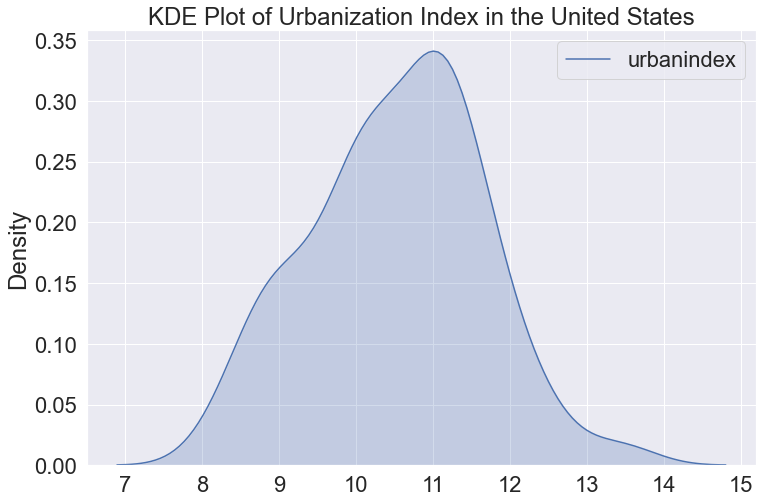

In [56]:
f, axes = plt.subplots(figsize=(12,8))

# set the plot
ax = sns.kdeplot(df.urbanindex, shade=True, color="b")

# set the title and x,y labels
plt.title("KDE Plot of Urbanization Index in the United States")
plt.ylabel("Density")

Text(0.5, 0, 'Urban Index')

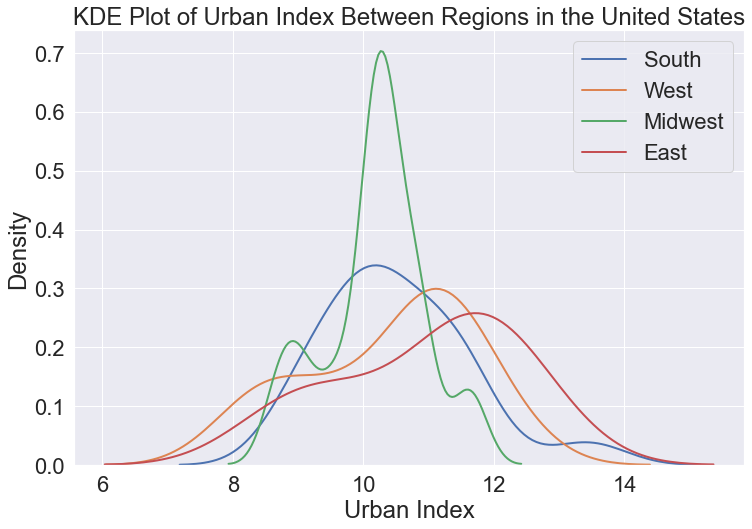

In [57]:
f, axes = plt.subplots(figsize=(12,8))

# create list of continents
continents = df['region'].value_counts().index.tolist()

# set kde plot for each continent
for c in continents:
    subset = df[df['region'] == c]
    sns.kdeplot(subset["urbanindex"], label=c, linewidth=2)
    
# set title, x and y labels
plt.title("KDE Plot of Urban Index Between Regions in the United States")
plt.ylabel("Density")
plt.xlabel("Urban Index")

Text(0, 0.5, 'Density')

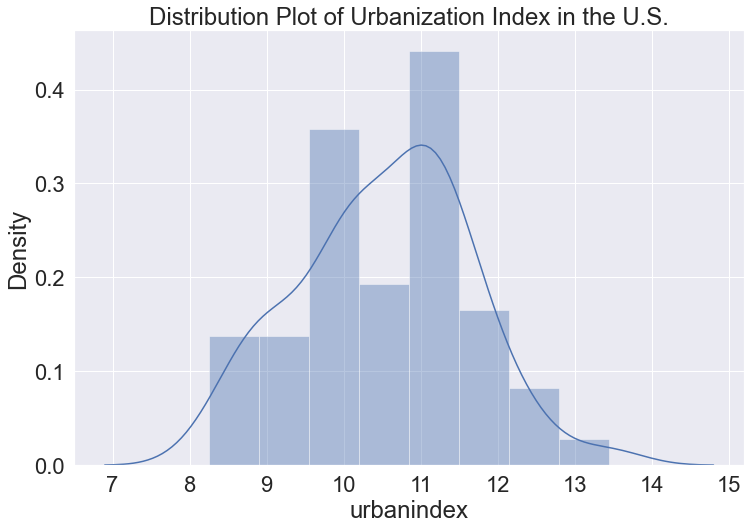

In [31]:
f, axes = plt.subplots(figsize=(12,8))

# set plot
ax = sns.distplot(df.urbanindex, hist=True, color="b")

# set title and x,y labels
plt.title("Distribution Plot of Urbanization Index in the U.S.")
plt.ylabel("Density")

Text(0.5, 1.0, 'Boxplot of Urbanization Index in the United States')

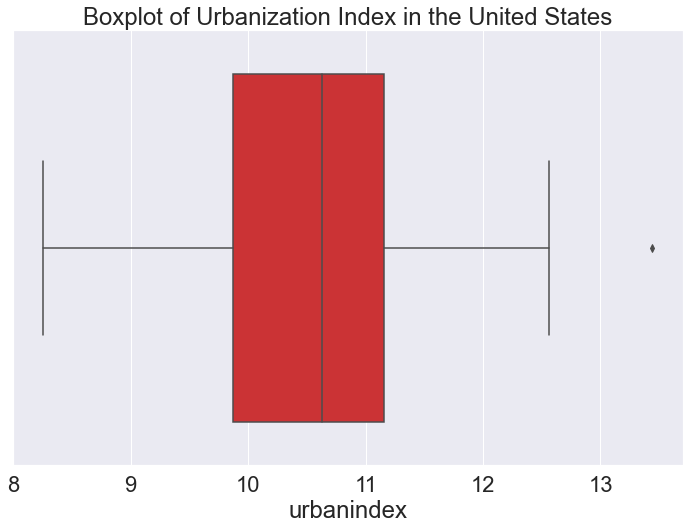

In [41]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set the plot
sns.boxplot(x="urbanindex", data=df, palette="Set1")

# set title and save figure
plt.title("Boxplot of Urbanization Index in the United States")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/boxplot.png')

# Urbanization Index in the United States Summary Statistics:
Data range is between 8.3 and 13.4 approximately.
First quartile is 9.8.
Median (second quartile) is 10.6.
Third quartile is 11.2.
Half of the life expectancy data is between 9.8 and 11.2, which are within the box.
For the KDE Plot, the Midwest spiked more in the median, more cities in the Midwest are closer to the median index which is in between 10 and 12.
Similar to popular belief, the West and East are more urbanized than the other regions, though the East is spearheading than the rest. 


Text(0.5, 1.0, 'Boxplot of Urbanization Index between Regions in the United States')

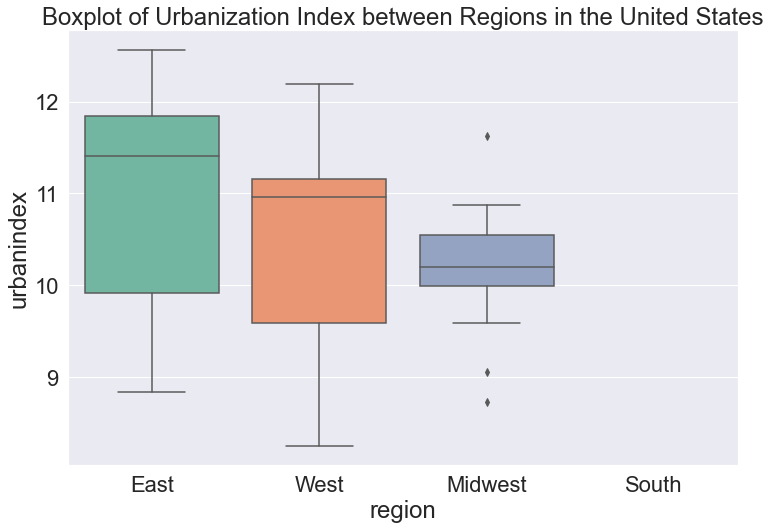

In [61]:
f, ax = plt.subplots(figsize=(12, 8))

# set the plot with the ordered continents
sns.boxplot(x="region", y="urbanindex", data=df,
            palette="Set2",
            order=["East", "West", "Midwest", "South"])

# set title and save figure
plt.title("Boxplot of Urbanization Index between Regions in the United States")

# Some Findings from Urbanization Index Summary Statistics of Regions:
There are no outliers, but there is a wider spread in the East and West regions since it is expected and reasonable to say that coastal regions are more urbanized. 
The Midwest has a few outliers, which are more than 11 and less than 9.7.
Urban index data range starts at 10, which makes every data point smaller than 10 as outliers.
East has the highest quartiles.
The South surprisingly does not show any data, despite it being presented in the KDE Plot.
Half of the urban index data points lie between 10 and 10.5 in the Midwest.
This is not a comprehensive graph since not all data is protrayed in this boxplot. The Southern region is missing, and many southern states do indeed have an increasing level of urban centers based on the raw data.

Text(0.5, 1.0, 'Boxenplot of Urban Index Between Regions in the United States')

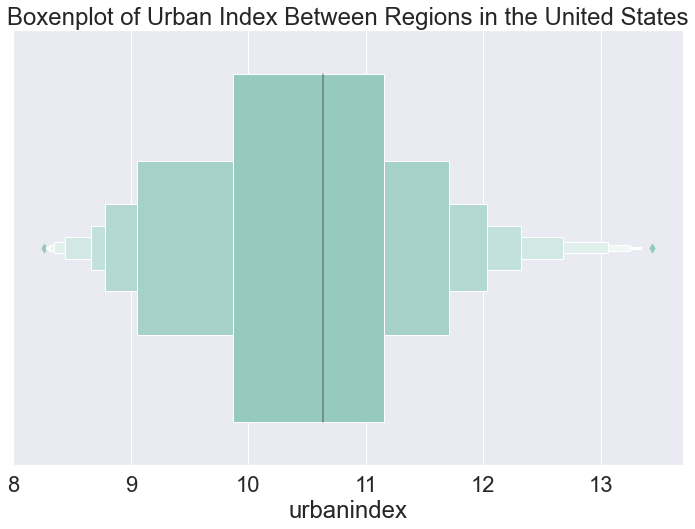

In [54]:
f, ax = plt.subplots(figsize=(12, 8))

# set plot
sns.boxenplot(x="urbanindex", data=df,palette="Set3")

# set title and save plot
plt.title("Boxenplot of Urban Index Between Regions in the United States")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/boxenplotplot.png')

# Interpretation of Boxenplot for Urban Index between Regions:

Median is at 10.7.
First and third quartiles are at 9.9 and 11.2 respectively.
Eights are at 9.1 and 11.7.
Sixteenths are at 8.8 and 12.
There is one outlier which is less than 8.5 and another outlier that is more than 13.

Text(0.5, 1.0, 'Boxenplot of Urbanization Index between Regions in the U.S.')

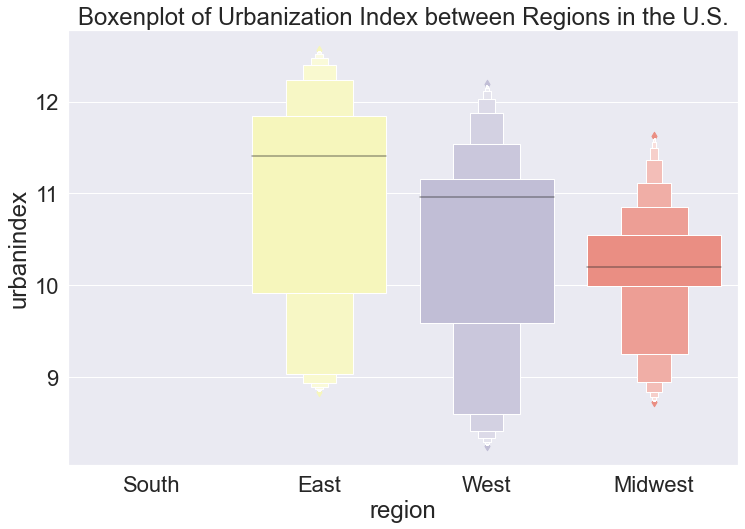

In [65]:
f, ax = plt.subplots(figsize=(12, 8))

# set plot
sns.boxenplot(x="region", y="urbanindex", data=df,
               palette="Set3",
               order=["South", "East", "West", "Midwest"])

# set title and save plot
plt.title("Boxenplot of Urbanization Index between Regions in the U.S.")

Text(0.5, 1.0, 'Violinplot of Urbanization Index in the U.S.')

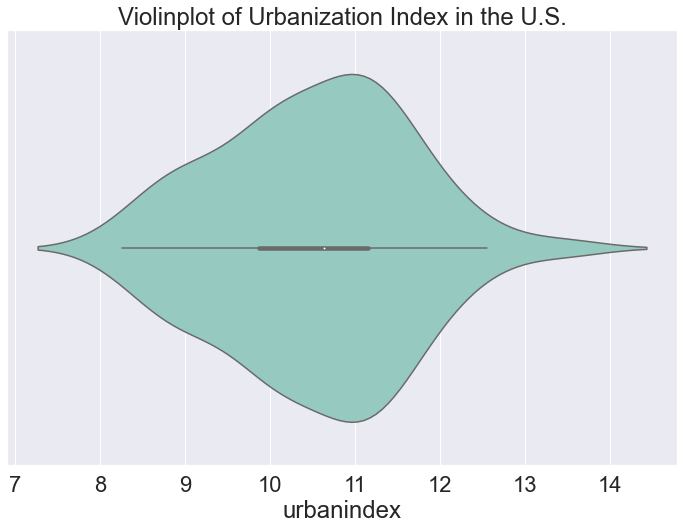

In [67]:
f, ax = plt.subplots(figsize=(12, 8))

# set the plot
sns.violinplot(x="urbanindex", data=df, palette="Set3")

# set title and save figure
plt.title("Violinplot of Urbanization Index in the U.S.")

Text(0.5, 1.0, 'Violinplot of Urbanization Index in the U.S.')

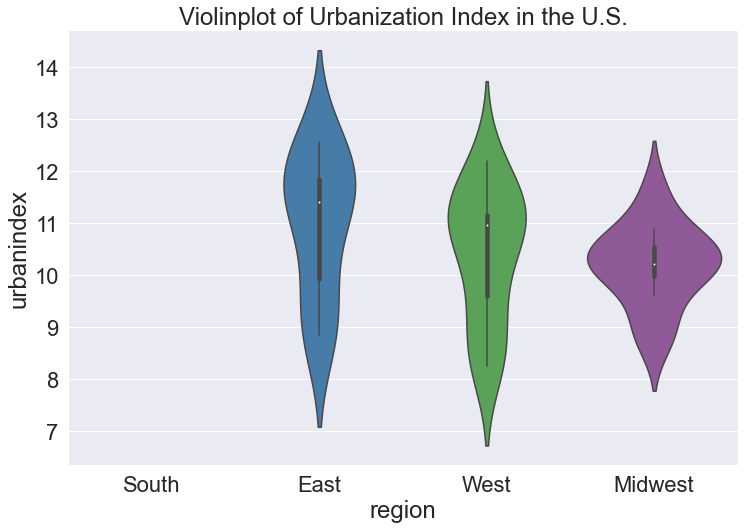

In [70]:
f, ax = plt.subplots(figsize=(12, 8))

# set the plot with ordered continents
sns.violinplot(x="region", y="urbanindex", data=df,
               palette="Set1",
               order=["South", "East", "West", "Midwest"])

# set title and save figure
plt.title("Violinplot of Urbanization Index in the U.S.")

Text(0.5, 1.0, 'Violinplot of Urbanization Index in the United States')

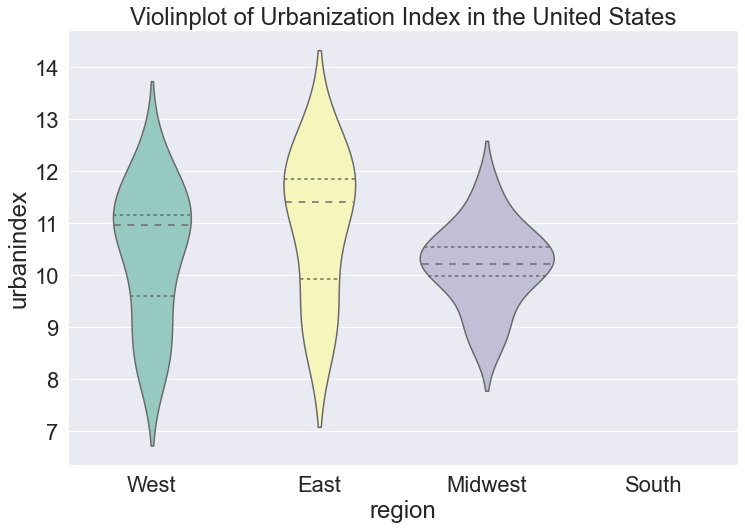

In [71]:
f, ax = plt.subplots(figsize=(12, 8))

# set the plot
sns.violinplot(x="region", y="urbanindex", data=df,
               palette="Set3",
               order=["West", "East", "Midwest", "South"],
               inner="quartile")

# save figure and set the title
plt.title("Violinplot of Urbanization Index in the United States")

Text(0.5, 1.0, 'Violinplot of Urbanization Index in the U.S.')

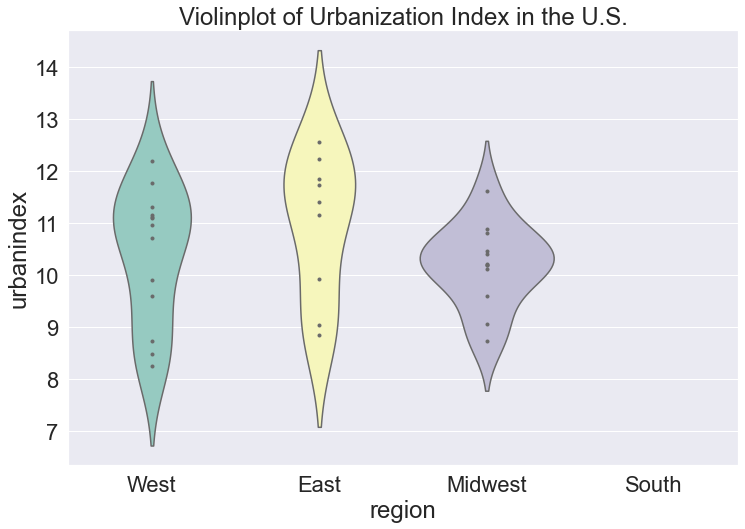

In [72]:
f, ax = plt.subplots(figsize=(12, 8))

# set the plot
sns.violinplot(x="region", y="urbanindex", data=df,
               palette="Set3",
               order=["West", "East", "Midwest", "South"],
               inner="point")

# set title and save figure
plt.title("Violinplot of Urbanization Index in the U.S.")

# Interpretation of Violinplot
The Midwest has more areas with an urban index of 10 compared to other regions, which is approximate to the mean and median of the distribution, and definitely represents the mode of the distribution. It is highly likely that the median and mean are more skewed towards the data that comprises the Midwest.

# Conclusion
The violinplot and the KDE Plot are most useful when I am looking for aggregated data of certain regions. In this case, I can quickly state that the East Coast has the highest urban index, but the Midwest is slowly taking pace after the West coast and the East. To look at or examine numbers only, I would pick histograms and boxplots if I'm only interested in what is the distribution numbers of all regions combined, and only when I'm identifying what quartiles, mean of the data are, and to what direction this skewed. To examine regions separately and the categorical variables, I would use KDE plots and violinplots.